# Analyse et Prédiction du Diabète (Partie C)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

Preparation des donnée

In [ ]:
df = pd.read_csv('assets/diabetes.csv')

# Nettoyage des données
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

# Remplacement des valeurs manquantes par la médiane
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].fillna(df[cols_with_invalid_zeros].median())

# Standardisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Outcome', axis=1))
df_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])
df_scaled['Outcome'] = df['Outcome']

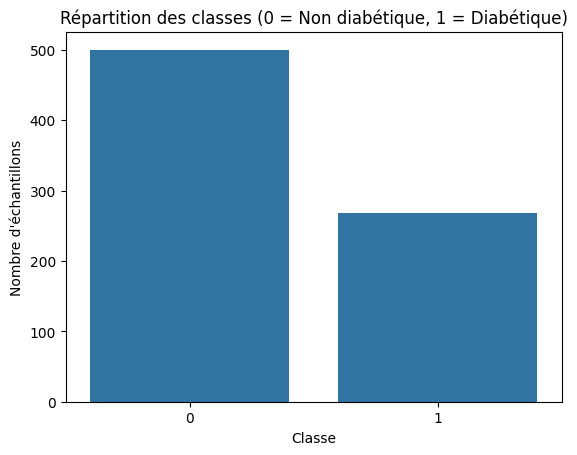

Statistiques descriptives par classe :
         Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Outcome                                                                  
0          -0.162456 -0.360776      -0.121329      -0.157313 -0.149199   
1           0.303090  0.673089       0.226360       0.293494  0.278356   

              BMI  DiabetesPedigreeFunction       Age  
Outcome                                                
0       -0.228450                 -0.127275 -0.174505  
1        0.426212                  0.237453  0.325569  


In [ ]:
# Analyse exploratoire (EDA)
sns.countplot(x='Outcome', data=df_scaled)
plt.title('Répartition des classes (0 = Non diabétique, 1 = Diabétique)')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.show()

print("Statistiques descriptives par classe :")
print(df_scaled.groupby('Outcome').mean())

In [ ]:
# Split Train / Validation / Test
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)


In [ ]:
# Modélisation : Régression Logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Évaluation sur Validation Set
y_val_pred = model.predict(X_val)
print("\nÉvaluation sur le set de validation :")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision :", precision_score(y_val, y_val_pred))
print("Recall :", recall_score(y_val, y_val_pred))
print("F1-score :", f1_score(y_val, y_val_pred))


Évaluation sur le set de validation :
Accuracy : 0.7792207792207793
Precision : 0.7272727272727273
Recall : 0.5925925925925926
F1-score : 0.6530612244897959


In [ ]:
# Évaluation sur Test Set
y_test_pred = model.predict(X_test)
print("\nMatrice de confusion (Test set) :")
print(confusion_matrix(y_test, y_test_pred))

print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_test_pred))


Matrice de confusion (Test set) :
[[82 18]
 [27 27]]

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [ ]:
# Analyse de l’importance des features
importance = pd.Series(abs(model.coef_[0]), index=X.columns).sort_values(ascending=False)
print("\nImportance des features :")
print(importance)


Importance des features :
Glucose                     1.247625
BMI                         0.789056
Pregnancies                 0.322014
DiabetesPedigreeFunction    0.290537
BloodPressure               0.172724
Age                         0.138552
Insulin                     0.113944
SkinThickness               0.073408
dtype: float64


# Conclusion
- Le modèle de régression logistique donne une base simple mais efficace.
- Les features les plus importantes sont généralement le glucose, l’IMC, et l’âge.
- Pour améliorer les performances : considérer d'autres modèles, équilibrer davantage les classes, ou explorer l'interaction entre variables.
- Il est recommandé d'assurer la qualité des données collectées pour les futures prédictions (éviter les 0 cliniquement non valides).
